In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
sns.set_theme(style="darkgrid")

In [30]:
results_jblas = pd.read_csv('results_jblas.csv')
results_ode = pd.read_csv('results_ode.csv')
results_no_exp = pd.read_csv('results_no_mexp.csv')

In [31]:
jblas_durations = (
    results_jblas
    .drop(columns=['bdmm_likelihood', 'flow_likelihood'])
    .melt(id_vars=['node_count', 'leaf_count', 'types_count', 'process_length'], var_name='algorithm', value_name='duration')
)
ode_durations = (
    results_jblas
    .drop(columns=['bdmm_likelihood', 'flow_likelihood'])
    .melt(id_vars=['node_count', 'leaf_count', 'types_count', 'process_length'], var_name='algorithm', value_name='duration')
)

JBLAS
0.1534061246530059
ODE
1.1893837849665636
No IP
1.8642968159429794


<Axes: xlabel='Method', ylabel='Rel. performance'>

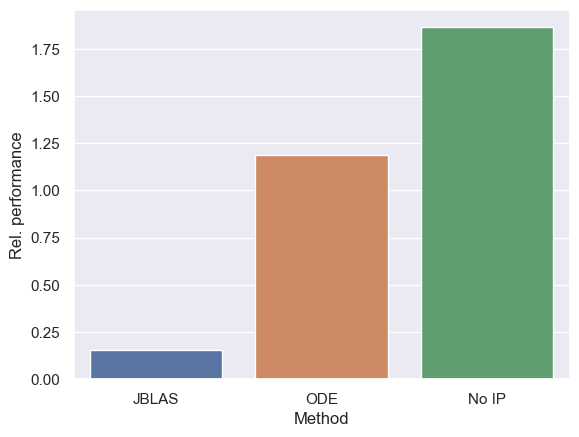

In [40]:
print("JBLAS")
print(results_jblas["bdmm_duration"].sum() / results_jblas["flow_duration"].sum())

print("ODE")
print(results_ode["bdmm_duration"].sum() / results_ode["flow_duration"].sum())

print("No IP")
print(results_no_exp["bdmm_duration"].sum() / results_no_exp["flow_duration"].sum())

sns.barplot(data=pd.DataFrame({
    "Method": ["JBLAS", "ODE", "No IP"],
    "Rel. performance": [
        results_jblas["bdmm_duration"].sum() / results_jblas["flow_duration"].sum(),
        results_ode["bdmm_duration"].sum() / results_ode["flow_duration"].sum(),
        results_no_exp["bdmm_duration"].sum() / results_no_exp["flow_duration"].sum()
    ]
}), x="Method", y="Rel. performance")

Text(0, 0.5, 'BDMM Log Likelihood')

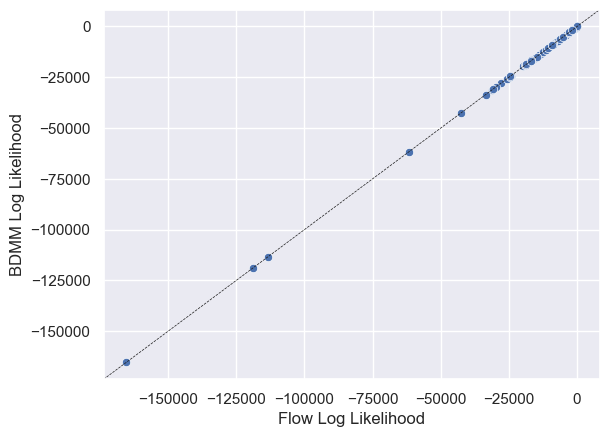

In [33]:
ax = sns.scatterplot(results_jblas, x="flow_likelihood", y="bdmm_likelihood")
ax.plot(ax.get_xlim(), ax.get_xlim(), linestyle='--', color='k', lw=0.5, scalex=False, scaley=False)

plt.xlabel('Flow Log Likelihood')
plt.ylabel('BDMM Log Likelihood')

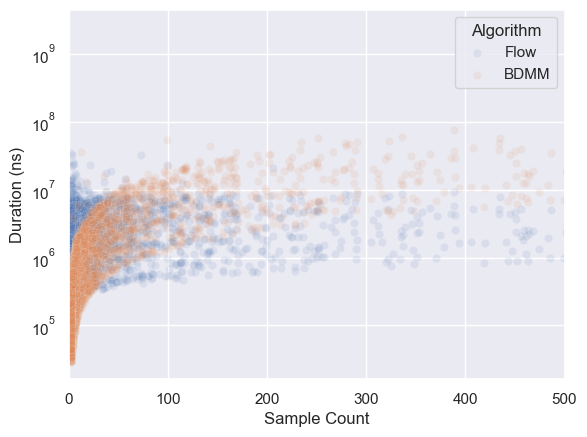

In [36]:
sns.scatterplot(results_no_exp, x="leaf_count", y="flow_duration", alpha=0.1)
sns.scatterplot(results_no_exp, x="leaf_count", y="bdmm_duration", alpha=0.1)

plt.yscale('log')

plt.xlim(0, 500)

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')

plt.legend(labels=["Flow", "BDMM"], title="Algorithm")

Text(0, 0.5, 'Duration (ns)')

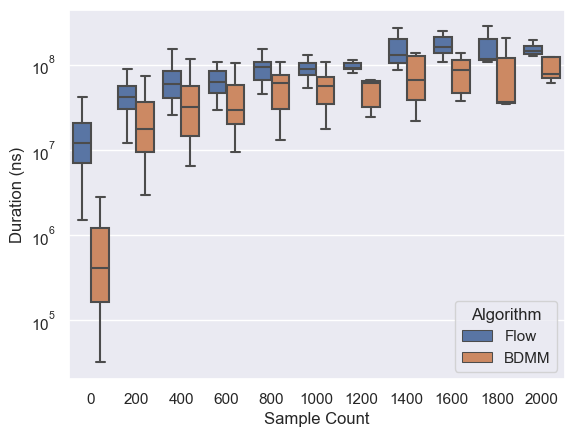

In [35]:
jblas_durations["binned_leaves"] = jblas_durations["leaf_count"].map(lambda x: x // 200 * 200)

ax = sns.boxplot(
    jblas_durations[jblas_durations["binned_leaves"] < 2200], 
    x="binned_leaves", y="duration", hue="algorithm",
    showfliers=False
)

legend_handles, _ = ax.get_legend_handles_labels()
ax.legend(legend_handles, ["Flow", "BDMM"], title="Algorithm")

plt.yscale('log')

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')